## PCA and unsupervised learning for CNFs

In [1]:
#Import the libraries
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics.cluster import contingency_matrix
import seaborn as sns
import statsmodels.api as sm

Function to load the smaller datasets created in the Notebook "Function_make_datasets"

In [2]:
def load_dataset(filename):
    path1 = ''
    path = path1 + filename + '.csv'
    loaded_data = pd.read_csv(path)
    numpy_data = loaded_data.T.to_numpy()
    return numpy_data

## Loading CNFs datasets
The datasets consist of 100 snapshots each, and each dataset is divided by the corresponding time of exposure.

CM1

In [3]:
#CM1 Conc.1.0
s48_1 = load_dataset(filename='CM1_exp1_conc1.0')/350
s48_2 = load_dataset(filename='CM1_exp2_conc1.0')/350
s48_3 = load_dataset(filename='CM1_exp3_conc1.0')/350

In [4]:
#CM1 Conc.2.0
#s60_1 = pload_dataset(filename='CM1_exp1_conc2.0')/100
s60_2 = load_dataset(filename='CM1_exp2_conc2.0')/100
s60_3 = load_dataset(filename='CM1_exp3_conc2.0')/100

In [5]:
#CM1 Conc.3.0
s24_1 = load_dataset(filename='CM1_exp1_conc3.0')/50
s24_2 = load_dataset(filename='CM1_exp2_conc3.0')/50
s24_3 = load_dataset(filename='CM1_exp3_conc3.0')/50

CM2

In [6]:
#CM2 Conc.1.0
s37_1 = load_dataset(filename='CM2_exp1_conc1.0')/500
s37_2 = load_dataset(filename='CM2_exp2_conc1.0')/500
s37_3 = load_dataset(filename='CM2_exp3_conc1.0')/500

In [7]:
#CM2 Conc.2.0
s49_1 = load_dataset(filename='CM2_exp1_conc2.0')/100
s49_2 = load_dataset(filename='CM2_exp2_conc2.0')/100
s49_3 = load_dataset(filename='CM2_exp3_conc2.0')/100

In [8]:
#CM2 Conc.2.7
s13_1 = load_dataset(filename='CM2_exp1_conc2.7')/50
s13_2 = load_dataset(filename='CM2_exp2_conc2.7')/50
s13_3 = load_dataset(filename='CM2_exp3_conc2.7')/50

CM3

In [9]:
#CM3 Conc.1.0
s38_1 = load_dataset(filename='CM3_exp1_conc1.0')/900
s38_2 = load_dataset(filename='CM3_exp2_conc1.0')/900
s38_3 = load_dataset(filename='CM3_exp3_conc1.0')/900

In [10]:
#CM630 Conc.2.0
#s50_1 = load_dataset(filename='CM3_exp1_conc2.0')/200
s50_2 = load_dataset(filename='CM3_exp2_conc2.0')/200
s50_3 = load_dataset(filename='CM3_exp3_conc2.0')/200

In [11]:
#CM3 Conc.3.0
s14_1 = load_dataset(filename='CM3_exp1_conc3.0')/75
s14_2 = load_dataset(filename='CM3_exp2_conc3.0')/75
s14_3 = load_dataset(filename='CM3_exp3_conc3.0')/75

CM4

In [12]:
#CM4 Conc.1.0
s45_1 = load_dataset(filename='CM4_exp1_conc1.0')/900
s45_2 = load_dataset(filename='CM4_exp2_conc1.0')/900
s45_3 = load_dataset(filename='CM4_exp3_conc1.0')/900

In [13]:
#CM4 Conc.2.0
s57_1 = load_dataset(filename='CM4_exp1_conc2.0')/300
s57_2 = load_dataset(filename='CM4_exp2_conc2.0')/300
s57_3 = load_dataset(filename='CM4_exp3_conc2.0')/300

In [14]:
#CM4 Conc.3.0
s21_1 = load_dataset(filename='CM4_exp1_conc3.0')/125
s21_2 = load_dataset(filename='CM4_exp2_conc3.0')/125
s21_3 = load_dataset(filename='CM4_exp3_conc3.0')/125

CM5

In [15]:
#CM5 Conc.1.0
#s39_1 = pload_dataset(filename='CM5_exp1_conc1.0')/900
s39_2 = load_dataset(filename='CM5_exp2_conc1.0')/900
s39_3 = load_dataset(filename='CM5_exp3_conc1.0')/900

In [16]:
#CM5 Conc.2.0
#s51_1 = load_dataset(filename='CM5_exp1_conc2.0')/400
s51_2 = load_dataset(filename='CM5_exp2_conc2.0')/400
s51_3 = load_dataset(filename='CM5_exp3_conc2.0')/400

In [17]:
#CM5 Conc.3.0
s15_1 = load_dataset(filename='CM5_exp1_conc3.0')/150
s15_2 = load_dataset(filename='CM5_exp2_conc3.0')/150
s15_3 = load_dataset(filename='CM5_exp3_conc3.0')/150

Stacking all the data together to perform PCA

In [18]:
#data including all the materials and concentrations except one material
data = np.vstack((s13_1,s13_2,s13_3, 
                  s37_1,s37_2,s37_3,
                  s49_1,s49_2,s49_3,
                  s14_1,s14_2,s14_3, 
                  s38_1,s38_2,s38_3,
                  s50_2,s50_3,
                  s15_1,s15_2,s15_3, 
                  s39_2,s39_3,
                  s51_2,s51_3,
                  s21_1,s21_2,s21_3,
                  s45_1,s45_2,s45_3,
                  s57_1,s57_2,s57_3))

In [19]:
#data including the three concentrations of the material left out from the "data" array
data_new = np.vstack((s24_1,s24_2,s24_3,
                  s48_1,s48_2,s48_3,
                  s60_2,s60_3))

In [20]:
#shape of our dataset including all the materials and concentrations except one material
data.shape

(3300, 64000)

In [21]:
#shape of our dataset including the three concentrations of the material left out from the "data" array
data_new.shape

(800, 64000)

# PCA

Normalizing the data and then performing PCA with 70 components (scaled from 60000 down to 30)

In [22]:
# Normalization
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)) 
norm_data = scaler.fit_transform(data)
norm_data_new = scaler.fit_transform(data_new)
norm_data_all = np.vstack((norm_data, norm_data_new))

In [23]:
# PCA, fit on "data" and transform on both normalized datasets ("norm_data and norm_data_new")
pca = PCA(n_components=70)
pca.fit(norm_data)
data_pca = pca.transform(norm_data)
data_pca_new = pca.transform(norm_data_new)

In [24]:
# PCA data all together 
data_pca_all = np.vstack((data_pca,data_pca_new))

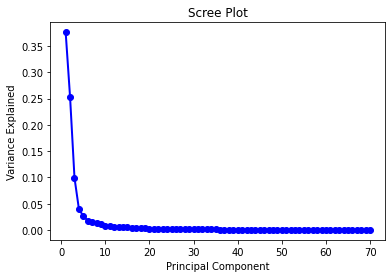

In [25]:
# Scree plot of PCs
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [26]:
# Cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

([<matplotlib.axis.XTick at 0x7fe71a01f940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

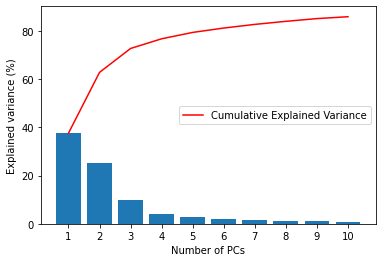

In [27]:
path_figure = ''
name_figure = ''
# Bar plot of explained_variance
plt.bar(
    range(1,11),
    pca.explained_variance_ratio_[0:10]*100
    )
 
plt.plot(
    range(1,11),
    np.cumsum(pca.explained_variance_ratio_[0:10])*100,
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend()
plt.xlabel('Number of PCs')
plt.ylabel('Explained variance (%)')
plt.xticks(np.arange(1,11,1))
#plt.title('Scree plot')
 
#plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")

In [28]:
print(pca.explained_variance_ratio_*100)
print(var_cumu)

[3.76070873e+01 2.52494570e+01 9.92264463e+00 4.02341399e+00
 2.64284736e+00 1.81738063e+00 1.51452938e+00 1.27035935e+00
 1.13505223e+00 7.81668328e-01 7.64461306e-01 6.59060013e-01
 6.06890430e-01 5.65571891e-01 5.46421167e-01 4.90053029e-01
 4.39145282e-01 3.28469399e-01 3.07328819e-01 2.86420327e-01
 2.71974323e-01 2.45406520e-01 2.39843903e-01 2.19891847e-01
 1.91905140e-01 1.84979054e-01 1.77217472e-01 1.67287667e-01
 1.53564833e-01 1.52940648e-01 1.40921743e-01 1.38525005e-01
 1.34623516e-01 1.32155864e-01 1.21868540e-01 1.10051845e-01
 1.07101671e-01 1.03443627e-01 1.01551628e-01 9.45470676e-02
 9.21519688e-02 8.91527399e-02 8.63830939e-02 7.93467560e-02
 7.71963616e-02 7.60588911e-02 6.76149461e-02 6.57908734e-02
 6.42336456e-02 6.00546528e-02 5.69659539e-02 5.47017052e-02
 5.38380012e-02 5.28819564e-02 5.02806513e-02 4.98210157e-02
 4.72197189e-02 4.48011999e-02 4.46302245e-02 4.33253403e-02
 4.20234306e-02 4.09173367e-02 3.84567540e-02 3.82728492e-02
 3.71482800e-02 3.417338

Plot of PC1 and PC2 for all the materials and concentrations

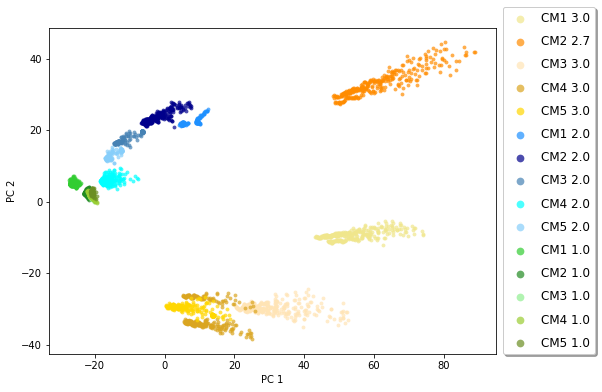

In [29]:
plt.figure(figsize=(8,6))
path_figure = ''
name_figure = ''
#plt.scatter(data_pca[:,0],data_pca[:,1])
plt.scatter(data_pca_new[0:300,0],data_pca_new[0:300,1], marker=".", s=60, lw=0, alpha=0.7, color='khaki', label='CM1 3.0')
plt.scatter(data_pca[0:300,0],data_pca[0:300,1],marker=".", s=60, lw=0, alpha=0.7, color='darkorange', label='CM2 2.7')
plt.scatter(data_pca[900:1200,0],data_pca[900:1200,1], marker=".", s=60, lw=0, alpha=0.7, color='moccasin', label='CM3 3.0')
plt.scatter(data_pca[2400:2700,0],data_pca[2400:2700,1], marker=".", s=60, lw=0, alpha=0.7, color='goldenrod', label='CM4 3.0')
plt.scatter(data_pca[1700:2000,0],data_pca[1700:2000,1], marker=".", s=60, lw=0, alpha=0.7, color='gold', label='CM5 3.0')
plt.scatter(data_pca_new[600:800,0],data_pca_new[600:800,1], marker=".", s=60, lw=0, alpha=0.7, color='dodgerblue', label='CM1 2.0')
plt.scatter(data_pca[600:900,0],data_pca[600:900,1], marker=".", s=60, lw=0, alpha=0.7, color='darkblue', label='CM2 2.0')
plt.scatter(data_pca[1500:1700,0],data_pca[1500:1700,1], marker=".", s=60, lw=0, alpha=0.7, color='steelblue', label='CM3 2.0')
plt.scatter(data_pca[3000:3300,0],data_pca[3000:3300,1], marker=".", s=60, lw=0, alpha=0.7, color='cyan', label='CM4 2.0')
plt.scatter(data_pca[2200:2400,0],data_pca[2200:2400,1], marker=".", s=60, lw=0, alpha=0.7, color='lightskyblue', label='CM5 2.0')
plt.scatter(data_pca_new[300:600,0],data_pca_new[300:600,1], marker=".", s=60, lw=0, alpha=0.7, color='limegreen', label='CM1 1.0')
plt.scatter(data_pca[300:600,0],data_pca[300:600,1], marker=".", s=60, lw=0, alpha=0.7, color='forestgreen', label='CM2 1.0')
plt.scatter(data_pca[1200:1500,0],data_pca[1200:1500,1], marker=".", s=60, lw=0, alpha=0.7, color='lightgreen', label='CM3 1.0')
plt.scatter(data_pca[2700:3000,0],data_pca[2700:3000,1], marker=".", s=60, lw=0, alpha=0.7, color='yellowgreen', label='CM4 1.0')
plt.scatter(data_pca[2000:2200,0],data_pca[2000:2200,1], marker=".", s=60, lw=0, alpha=0.7, color='olivedrab', label='CM5 1.0')
plt.legend(loc='lower center', bbox_to_anchor=(1.12,-0.02), ncol = 1, fancybox=True, shadow=True, markerscale=2, fontsize=12, labelspacing=0.85 )
#plt.title('PC1 vs PC2 for all the materials and concentrations')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")
plt.show()

# Dataframe
Creating a dataframe containing first 4 PCs, concentrations, materials to plot and to use as true labels

In [30]:
path = ''
filename = 'df_cnfs_new'
new_path = path + filename + '.csv'
df_cnfs = pd.read_csv(new_path)

In [31]:
df_cnfs['PC_1'] = data_pca_all[:,0]
df_cnfs['PC_2'] = data_pca_all[:,1]
df_cnfs['PC_3'] = data_pca_all[:,2]
df_cnfs['PC_4'] = data_pca_all[:,3]

In [32]:
df_cnfs

,Unnamed: 0,Number,Experiment,Material,Conc,PC_1,PC_2,PC_3,PC_4
0,0,1,1,CM454,2.7,89.033900,41.994931,-17.659252,4.407155
1,1,1,1,CM454,2.7,88.790423,41.968470,-17.688681,4.287298
2,2,1,1,CM454,2.7,86.506695,41.779104,-17.629997,4.214857
3,3,1,1,CM454,2.7,84.436422,39.309014,-17.637760,4.187803
4,4,1,1,CM454,2.7,82.432569,41.017292,-16.953270,3.596286
...,...,...,...,...,...,...,...,...,...
4095,4095,15,3,CM394,2.0,5.424935,21.957523,-5.630080,10.428007
4096,4096,15,3,CM394,2.0,5.273302,21.700595,-5.836216,10.297682
4097,4097,15,3,CM394,2.0,5.249359,21.628255,-5.849100,10.106451
4098,4098,15,3,CM394,2.0,5.397838,21.813847,-5.810397,10.179142


In [33]:
true_labels_number = df_cnfs['Number']
true_labels_conc = df_cnfs['Conc']

# K-Means

In [34]:
# k-means for k in [1,19] to plot the SSE plot to identify the elbow
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca_all)
    sse.append(kmeans.inertia_)

/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

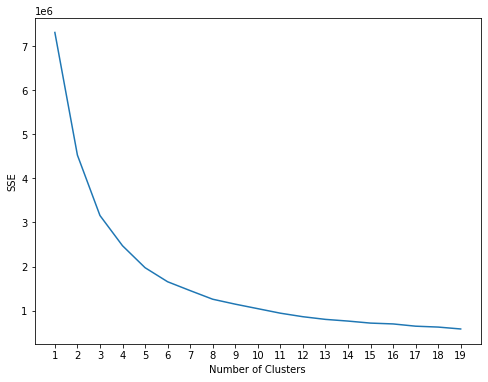

In [35]:
path_figure = ''
name_figure = ''

# SSE Plot 
plt.figure(figsize=(8,6))
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")

In [36]:
# identification of the elbow (optima number of clusters identified by the algorithm)
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
print(kl.elbow)

5


/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.434774972607218


/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4034521284003578


/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4230679633195663


/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 The average silhouette_score is : 0.46404123033546635


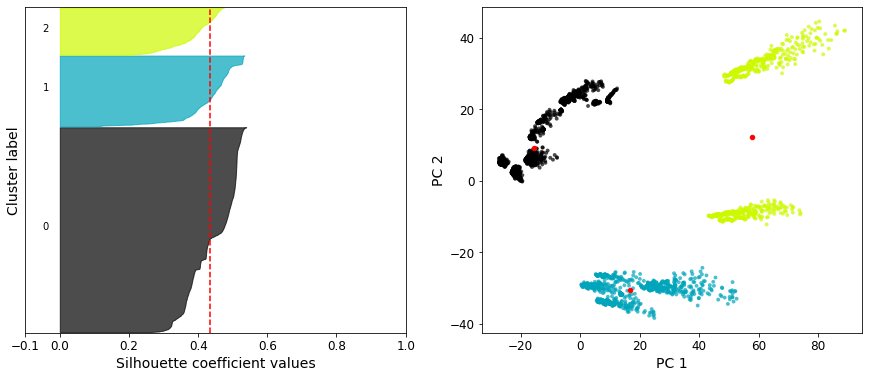

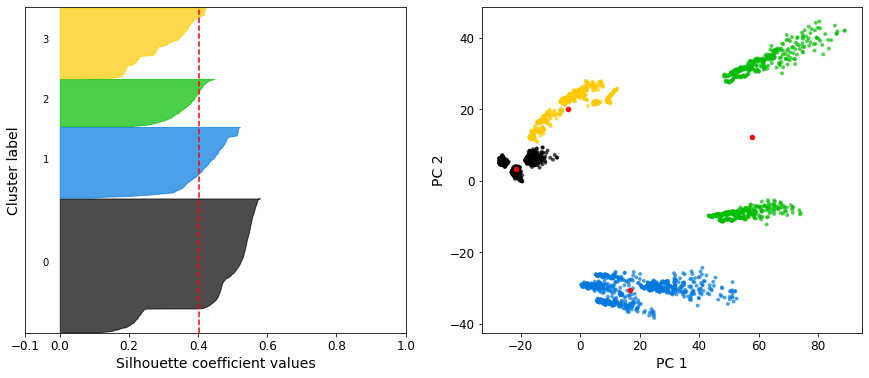

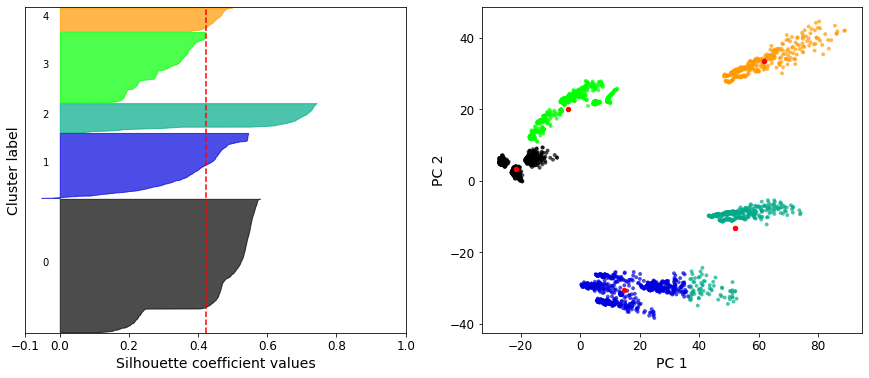

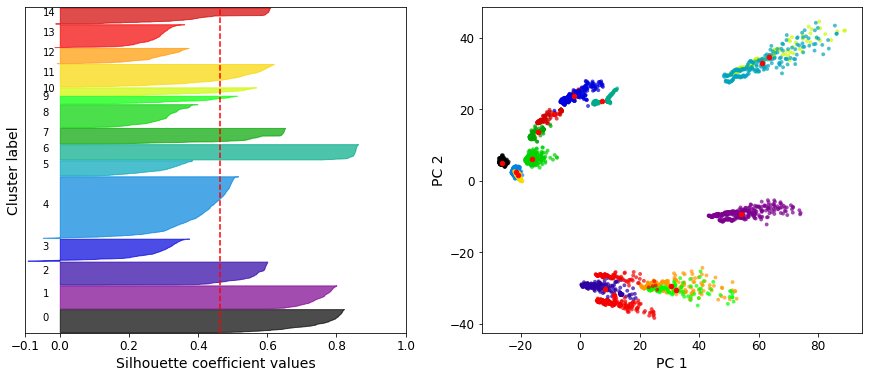

In [37]:
# Plots of the silhouette coefficients and the corresponding clusters identified by k-means for k=3,4,5,15

path_figure = ''
name_figure = ''

range_n_clusters = [3,4,5,15]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)

    # First subplot: silhouette coefficients
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_pca_all) + (n_clusters + 1) * 10])

    #k-means clusterer is initialized with number of clusters as defined above 
    #and a random generator seed for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_pca_all)   #labels of the clusters
    centroids = clusterer.cluster_centers_                 # centers of the clusters

    # The average silhouette value for all the samples is given by the silhouette_score
    silhouette_avg = silhouette_score(data_pca_all, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)

    # Compute the silhouette coefficients for each sample
    sample_silhouette_values = silhouette_samples(data_pca_all, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color,edgecolor=color,alpha=0.7,)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.set_xlabel("Silhouette coefficient values",fontsize=14)
    ax1.set_ylabel("Cluster label",fontsize=14)

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Second subplot: show the clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_pca_all[:, 0], data_pca_all[:, 1], marker=".", s=60, lw=0, alpha=0.7, 
                c=colors, edgecolor="k")
    ax2.scatter(centroids[:, 0], centroids[:, 1], c='r', s=20)

    #ax2.set_title("The visualization of the clustered data.")
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax2.set_xlabel("PC 1",fontsize=14)
    ax2.set_ylabel("PC 2",fontsize=14)

    #plt.suptitle(
      #  "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
      #  % n_clusters,
       # fontsize=14,
       # fontweight="bold",
    #)
    #plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")


In [38]:
# Silhouette coefficient for each k
silhouette_coefficients = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca_all)
    score = silhouette_score(data_pca_all, kmeans.labels_)
    silhouette_coefficients.append(score)

/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

Text(0, 0.5, 'Silhouette Coefficient')

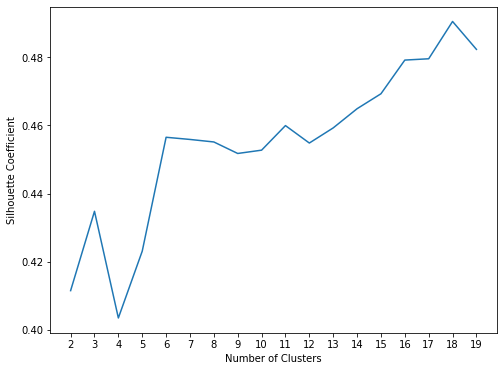

In [39]:
path_figure = ''
name_figure = ''

# Plot of the silhouette coefficients for k in [2,19]
plt.figure(figsize=(8,6))
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
#plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")

# Gaussian Mixture Models (GMMs)

Silhouette coefficients for the four covariances in GMMs: 'full'. 'tied', 'diag', 'spherical'

In [40]:
#Silhouette coeffcients for full covariance in GMM
silhouette_coefficients_gmm_full = []
for k in range(2, 20):
    gmm_full = GMM(k, covariance_type='full', n_init=30, init_params='kmeans').fit(data_pca_all)
    labels = gmm_full.predict(data_pca_all)
    silhouette_coefficients_gmm_full.append(silhouette_score(data_pca_all, labels))

In [41]:
#Silhouette coeffcients for tied covariance in GMM
silhouette_coefficients_gmm_tied = []
for k in range(2, 20):
    gmm_tied = GMM(k, covariance_type='tied', n_init=30, init_params='kmeans').fit(data_pca_all)
    labels = gmm_tied.predict(data_pca_all)
    silhouette_coefficients_gmm_tied.append(silhouette_score(data_pca_all, labels))

In [42]:
#Silhouette coeffcients for diag covariance in GMM
silhouette_coefficients_gmm_diag = []
for k in range(2, 20):
    gmm_diag = GMM(k, covariance_type='diag', n_init=30, init_params='kmeans').fit(data_pca_all)
    labels = gmm_diag.predict(data_pca_all)
    silhouette_coefficients_gmm_diag.append(silhouette_score(data_pca_all, labels))

In [43]:
#Silhouette coeffcients for spherical covariance in GMM
silhouette_coefficients_gmm_spher = []
for k in range(2, 20):
    gmm_spher = GMM(k, covariance_type='spherical', n_init=30, init_params='kmeans').fit(data_pca_all)
    labels = gmm_spher.predict(data_pca_all)
    silhouette_coefficients_gmm_spher.append(silhouette_score(data_pca_all, labels))

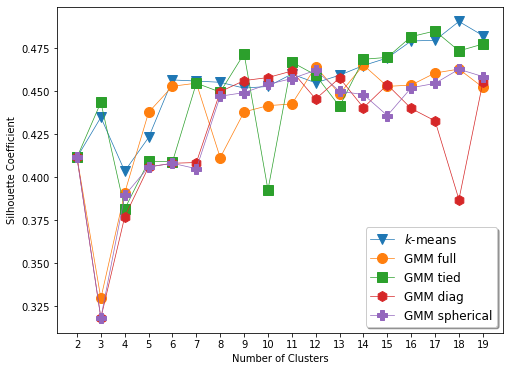

In [45]:
#Silhouette coefficient for k-means and the four covariances in GMM for up to 19 clusters

path_figure = ''
name_figure = 'silhouette_gmm_kmeans'
plt.figure(figsize=(8,6))
plt.plot(range(2,20), silhouette_coefficients, label='$\it{k}$-means', linewidth=0.7, marker='v', markersize=10)
plt.plot(range(2, 20), silhouette_coefficients_gmm_full, label='GMM full', linewidth=0.7, marker='o', markersize=10)
plt.plot(range(2, 20), silhouette_coefficients_gmm_tied, label='GMM tied', linewidth=0.7, marker='s', markersize=10)
plt.plot(range(2, 20), silhouette_coefficients_gmm_diag, label='GMM diag', linewidth=0.7, marker='h', markersize=10)
plt.plot(range(2, 20), silhouette_coefficients_gmm_spher, label='GMM spherical', linewidth=0.7, marker='P', markersize=10)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.legend(loc='lower right', fancybox=True, shadow=True, fontsize=12)
plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")

For n_clusters = 3 The average silhouette_score is : 0.31807250546558563
For n_clusters = 4 The average silhouette_score is : 0.3769677442641982
For n_clusters = 15 The average silhouette_score is : 0.4437538197591925


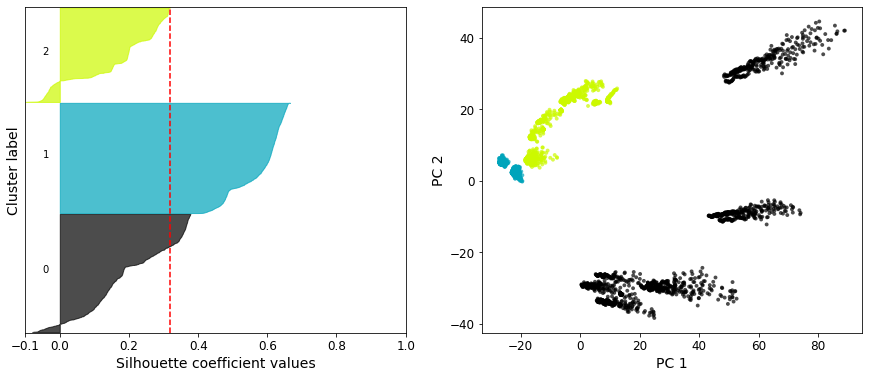

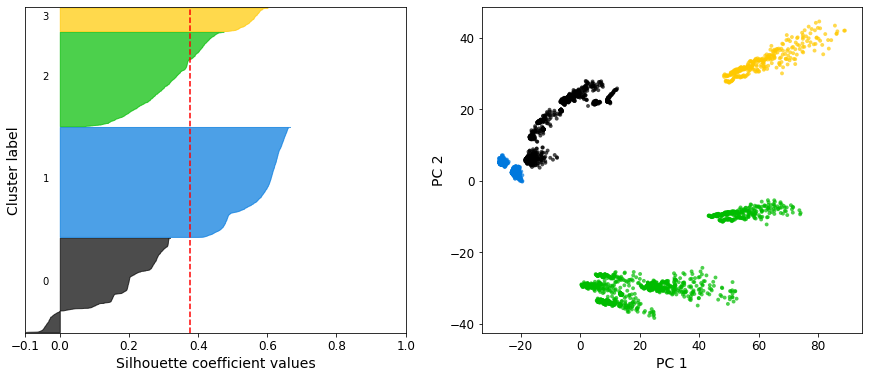

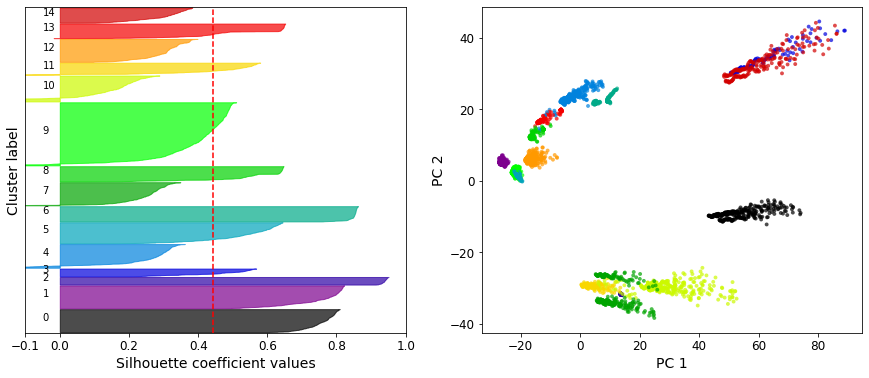

In [46]:
# Plots of the silhouette coefficients and the corresponding clusters identified by GMMs for k=3,4,15

path_figure = ''
name_figure = ''

range_n_clusters = [3,4]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)

    # First subplot: silhouette coefficients
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_pca_all) + (n_clusters + 1) * 10])

    #k-means clusterer is initialized with number of clusters as defined above 
    #and a random generator seed for reproducibility
    clusterer_gmm = GMM(n_components=n_clusters, covariance_type='diag', max_iter=500, n_init=30, 
                    init_params='kmeans',random_state=42).fit(data_pca_all) #use covariance_type 'diag' for k=3,4, and 'full' for k=15 for best results
    cluster_labels_gmm = clusterer_gmm.predict(data_pca_all)  #labels of the clusters

    # The average silhouette value for all the samples is given by the silhouette_score
    silhouette_avg = silhouette_score(data_pca_all, cluster_labels_gmm)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)

    # Compute the silhouette coefficients for each sample
    sample_silhouette_values = silhouette_samples(data_pca_all, cluster_labels_gmm)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_gmm == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color,edgecolor=color,alpha=0.7,)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.set_xlabel("Silhouette coefficient values",fontsize=14)
    ax1.set_ylabel("Cluster label",fontsize=14)

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Second subplot: show the clusters
    colors = cm.nipy_spectral(cluster_labels_gmm.astype(float) / n_clusters)
    ax2.scatter(data_pca_all[:, 0], data_pca_all[:, 1], marker=".", s=60, lw=0, alpha=0.7, 
                c=colors, edgecolor="k")

    #ax2.set_title("The visualization of the clustered data.")
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax2.set_xlabel("PC 1",fontsize=14)
    ax2.set_ylabel("PC 2",fontsize=14)

    #plt.suptitle(
      #  "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
      #  % n_clusters,
       # fontsize=14,
       # fontweight="bold",
    #)
    #plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")


For n_clusters = 15 The average silhouette_score is : 0.45574147064747567


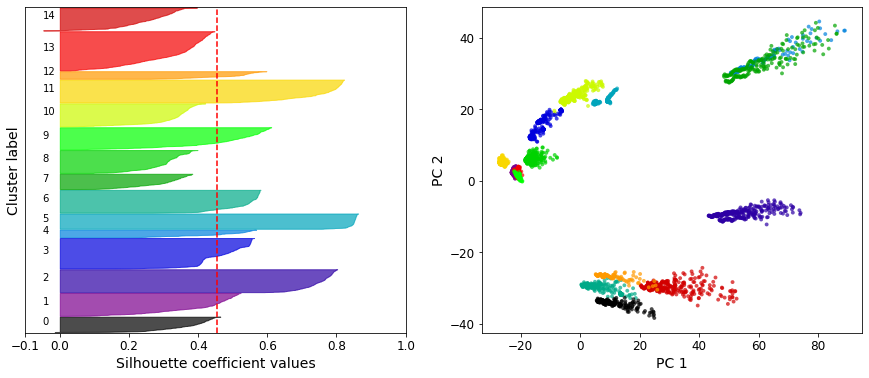

In [54]:
# Plots of the silhouette coefficients and the corresponding clusters identified by GMMs for k=3,4,15

path_figure = ''
name_figure = ''

range_n_clusters = [15]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 6)

    # First subplot: silhouette coefficients
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_pca_all) + (n_clusters + 1) * 10])

    #k-means clusterer is initialized with number of clusters as defined above 
    #and a random generator seed for reproducibility
    clusterer_gmm = GMM(n_components=n_clusters, covariance_type='full', max_iter=500, n_init=30, 
                    init_params='kmeans',random_state=42).fit(data_pca_all) #use covariance_type 'diag' for k=3,4, and 'full' for k=15 for best results
    cluster_labels_gmm = clusterer_gmm.predict(data_pca_all)  #labels of the clusters

    # The average silhouette value for all the samples is given by the silhouette_score
    silhouette_avg = silhouette_score(data_pca_all, cluster_labels_gmm)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg,)

    # Compute the silhouette coefficients for each sample
    sample_silhouette_values = silhouette_samples(data_pca_all, cluster_labels_gmm)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_gmm == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color,edgecolor=color,alpha=0.7,)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax1.set_xlabel("Silhouette coefficient values",fontsize=14)
    ax1.set_ylabel("Cluster label",fontsize=14)

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Second subplot: show the clusters
    colors = cm.nipy_spectral(cluster_labels_gmm.astype(float) / n_clusters)
    ax2.scatter(data_pca_all[:, 0], data_pca_all[:, 1], marker=".", s=60, lw=0, alpha=0.7, 
                c=colors, edgecolor="k")

    #ax2.set_title("The visualization of the clustered data.")
    ax2.tick_params(axis='x', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax2.set_xlabel("PC 1",fontsize=14)
    ax2.set_ylabel("PC 2",fontsize=14)

    #plt.suptitle(
      #  "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
      #  % n_clusters,
       # fontsize=14,
       # fontweight="bold",
    #)
    #plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")


# Purity scores

Purity scores for k-means and GMMs compared to true labels

In [47]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [55]:
# Report Purity Score
purity_kmeans = purity_score(true_labels_number, cluster_labels)
purity_gmm = purity_score(true_labels_number, cluster_labels_gmm)
print(f"The purity score for k-means is {round(purity_kmeans*100, 2)}%")
print(f"The purity score for GMM is {round(purity_gmm*100, 2)}%")

#purity_kmeans = purity_score(labels_true, cluster_labels)
#print(f"The purity score for K-Means is {round(purity_kmeans*100, 2)}%")

The purity score for k-means is 87.12%
The purity score for GMM is 89.78%


# Dataframe
Creating a dataframe containing furst 4 PCs, concentrations, materials to plot

In [49]:
path = ''
filename = 'df_cnfs'
new_path = path + filename + '.csv'
df_cnfs = pd.read_csv(new_path)

In [50]:
df_cnfs['PC_1'] = data_pca_all[:,0]
df_cnfs['PC_2'] = data_pca_all[:,1]
df_cnfs['PC_3'] = data_pca_all[:,2]
df_cnfs['PC_4'] = data_pca_all[:,3]

In [51]:
df_cnfs

,Unnamed: 0,Unnamed: 0.1,Number,Experiment,Material,PC_1,PC_2,PC_3,PC_4
0,0,0,1,1,CM454,89.033900,41.994931,-17.659252,4.407155
1,1,1,1,1,CM454,88.790423,41.968470,-17.688681,4.287298
2,2,2,1,1,CM454,86.506695,41.779104,-17.629997,4.214857
3,3,3,1,1,CM454,84.436422,39.309014,-17.637760,4.187803
4,4,4,1,1,CM454,82.432569,41.017292,-16.953270,3.596286
...,...,...,...,...,...,...,...,...,...
4095,4095,4095,15,3,CM394,5.424935,21.957523,-5.630080,10.428007
4096,4096,4096,15,3,CM394,5.273302,21.700595,-5.836216,10.297682
4097,4097,4097,15,3,CM394,5.249359,21.628255,-5.849100,10.106451
4098,4098,4098,15,3,CM394,5.397838,21.813847,-5.810397,10.179142


# Autcorrelation
Autocorrelation analysis for PCA data using the autocorrelation function (ACF) and the partial autocorrelation function (PACF)

Plots of the autocorrelation function (ACF) for each material and concentration. The blue is experiment one, the orange is experiment two and the green is experiment three.

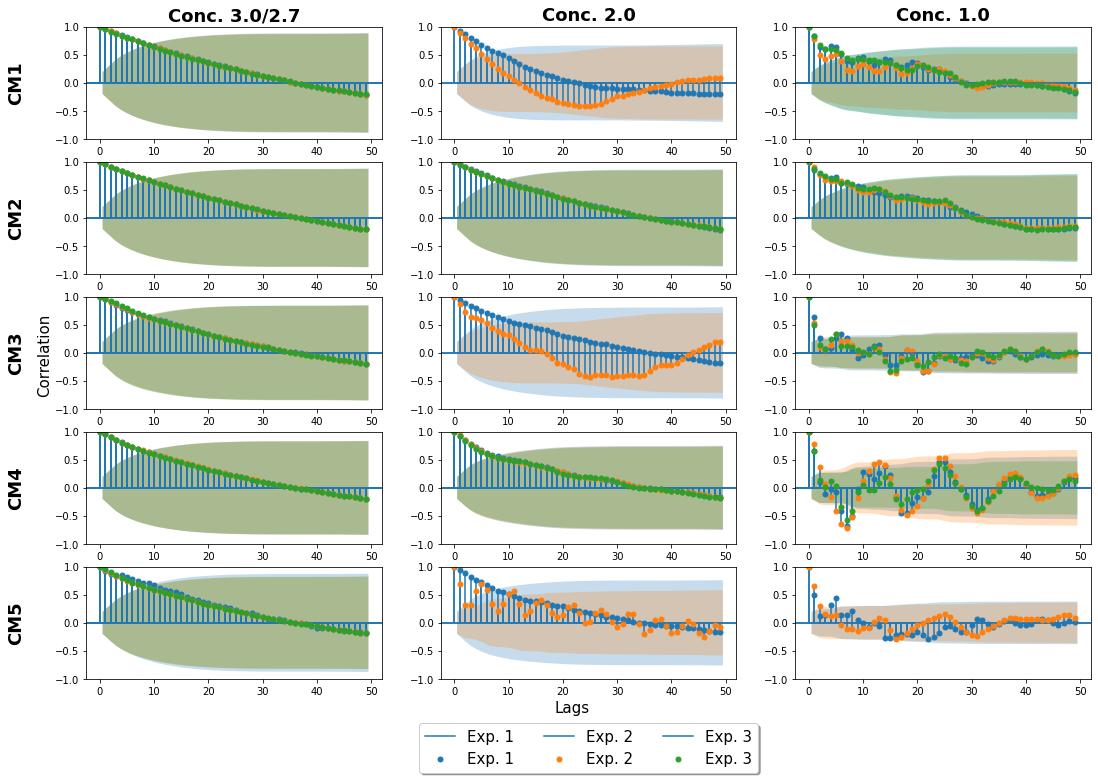

In [52]:
# Autocorrelation function (ACF) using the first PC of each material at all the concentrations for all the three experiments
path_figure = ''
name_figure = ''

fig, ax = plt.subplots(5,3,figsize=(18,12))

# Material CM2
sm.graphics.tsa.plot_acf(data_pca_all[0:100,0], lags=49, ax=ax[1,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[100:200,0], lags=49, ax=ax[1,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[200:300,0], lags=49, ax=ax[1,0], title='')
ax[1,0].set_ylabel('CM2', fontsize=18, fontweight='bold', labelpad=30)
fig.supylabel('Correlation',x=0.087,y=0.5,fontsize=15)

sm.graphics.tsa.plot_acf(data_pca_all[300:400,0], lags=49, ax=ax[1,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[400:500,0], lags=49, ax=ax[1,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[500:600,0], lags=49, ax=ax[1,2], title='')

sm.graphics.tsa.plot_acf(data_pca_all[600:700,0], lags=49, ax=ax[1,1], title='')
sm.graphics.tsa.plot_acf(data_pca_all[700:800,0], lags=49, ax=ax[1,1], title='')
sm.graphics.tsa.plot_acf(data_pca_all[800:900,0], lags=49, ax=ax[1,1], title='')

# Material CM3
sm.graphics.tsa.plot_acf(data_pca_all[900:1000,0], lags=49, ax=ax[2,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[1000:1100,0], lags=49, ax=ax[2,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[1100:1200,0], lags=49, ax=ax[2,0], title='')
ax[2,0].set_ylabel('CM3', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_acf(data_pca_all[1200:1300,0], lags=49, ax=ax[2,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[1300:1400,0], lags=49, ax=ax[2,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[1400:1500,0], lags=49, ax=ax[2,2], title='')

sm.graphics.tsa.plot_acf(data_pca_all[1500:1600,0], lags=49, ax=ax[2,1], title='')
sm.graphics.tsa.plot_acf(data_pca_all[1600:1700,0], lags=49, ax=ax[2,1], title='')

# Material CM5
sm.graphics.tsa.plot_acf(data_pca_all[1700:1800,0], lags=49, ax=ax[4,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[1800:1900,0], lags=49, ax=ax[4,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[1900:2000,0], lags=49, ax=ax[4,0], title='')
ax[4,0].set_ylabel('CM5', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_acf(data_pca_all[2000:2100,0], lags=49, ax=ax[4,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[2100:2200,0], lags=49, ax=ax[4,2], title='')

sm.graphics.tsa.plot_acf(data_pca_all[2200:2300,0], lags=49, ax=ax[4,1], title='')
sm.graphics.tsa.plot_acf(data_pca_all[2300:2400,0], lags=49, ax=ax[4,1], title='')

# Material CM4
sm.graphics.tsa.plot_acf(data_pca_all[2400:2500,0], lags=49, ax=ax[3,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[2500:2600,0], lags=49, ax=ax[3,0], title='')
sm.graphics.tsa.plot_acf(data_pca_all[2600:2700,0], lags=49, ax=ax[3,0], title='')
ax[3,0].set_ylabel('CM4', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_acf(data_pca_all[2700:2800,0], lags=49, ax=ax[3,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[2800:2900,0], lags=49, ax=ax[3,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[2900:3000,0], lags=49, ax=ax[3,2], title='')

sm.graphics.tsa.plot_acf(data_pca_all[3000:3100,0], lags=49, ax=ax[3,1], title='')
sm.graphics.tsa.plot_acf(data_pca_all[3100:3200,0], lags=49, ax=ax[3,1], title='')
sm.graphics.tsa.plot_acf(data_pca_all[3200:3300,0], lags=49, ax=ax[3,1], title='')

# Material CM1
sm.graphics.tsa.plot_acf(data_pca_all[3300:3400,0], lags=49, ax=ax[0,0], label='Exp. 1', title='')
sm.graphics.tsa.plot_acf(data_pca_all[3400:3500,0], lags=49, ax=ax[0,0], label='Exp. 2', title='')
sm.graphics.tsa.plot_acf(data_pca_all[3500:3600,0], lags=49, ax=ax[0,0], label='Exp. 3', title='')
ax[0,0].set_title('Conc. 3.0/2.7', fontsize=18, fontweight='bold')
ax[0,0].legend(loc='lower center', bbox_to_anchor=(1.7,-5.7), ncol = 3, fontsize=15, fancybox=True, shadow=True)
fig.supxlabel('Lags', x=0.5, y=0.083, fontsize=15)
ax[0,0].set_ylabel('CM1', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_acf(data_pca_all[3600:3700,0], lags=49, ax=ax[0,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[3700:3800,0], lags=49, ax=ax[0,2], title='')
sm.graphics.tsa.plot_acf(data_pca_all[3800:3900,0], lags=49, ax=ax[0,2], title='')
ax[0,2].set_title('Conc. 1.0', fontsize=18,fontweight='bold')

sm.graphics.tsa.plot_acf(data_pca_all[3900:4000,0], lags=49, ax=ax[0,1], title='')
sm.graphics.tsa.plot_acf(data_pca_all[4000:4100,0], lags=49, ax=ax[0,1], title='')
ax[0,1].set_title('Conc. 2.0', fontsize=18,fontweight='bold')

#plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")
plt.show()

Plots of the partial autocorrelation function (PACF) for each material and concentration. The blue is experiment one, the orange is experiment two and the green is experiment three.

/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.


/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/federica/anaconda3/envs/PINN_v2/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.


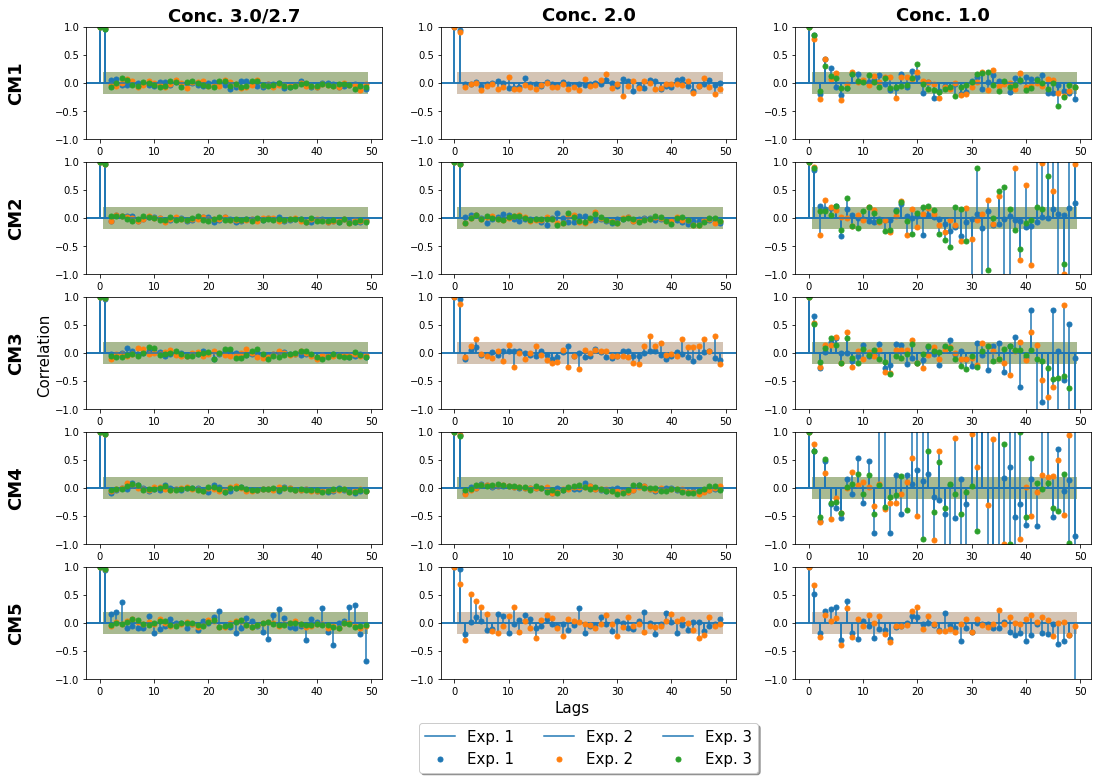

In [53]:
# Partial autocorrelation function (PACF) using the first PC of each material at all the concentrations for all the three experiments
path_figure = ''
name_figure = ''

fig, ax = plt.subplots(5,3,figsize=(18,12))

# Material CM2
sm.graphics.tsa.plot_pacf(data_pca_all[0:100,0], lags=49, ax=ax[1,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[100:200,0], lags=49, ax=ax[1,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[200:300,0], lags=49, ax=ax[1,0], title='')
ax[1,0].set_ylabel('CM2', fontsize=18, fontweight='bold', labelpad=30)
fig.supylabel('Correlation',x=0.087,y=0.5,fontsize=15)

sm.graphics.tsa.plot_pacf(data_pca_all[300:400,0], lags=49, ax=ax[1,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[400:500,0], lags=49, ax=ax[1,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[500:600,0], lags=49, ax=ax[1,2], title='')

sm.graphics.tsa.plot_pacf(data_pca_all[600:700,0], lags=49, ax=ax[1,1], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[700:800,0], lags=49, ax=ax[1,1], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[800:900,0], lags=49, ax=ax[1,1], title='')

# Material CM3
sm.graphics.tsa.plot_pacf(data_pca_all[900:1000,0], lags=49, ax=ax[2,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[1000:1100,0], lags=49, ax=ax[2,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[1100:1200,0], lags=49, ax=ax[2,0], title='')
ax[2,0].set_ylabel('CM3', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_pacf(data_pca_all[1200:1300,0], lags=49, ax=ax[2,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[1300:1400,0], lags=49, ax=ax[2,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[1400:1500,0], lags=49, ax=ax[2,2], title='')

sm.graphics.tsa.plot_pacf(data_pca_all[1500:1600,0], lags=49, ax=ax[2,1], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[1600:1700,0], lags=49, ax=ax[2,1], title='')

# Material CM5
sm.graphics.tsa.plot_pacf(data_pca_all[1700:1800,0], lags=49, ax=ax[4,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[1800:1900,0], lags=49, ax=ax[4,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[1900:2000,0], lags=49, ax=ax[4,0], title='')
ax[4,0].set_ylabel('CM5', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_pacf(data_pca_all[2000:2100,0], lags=49, ax=ax[4,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[2100:2200,0], lags=49, ax=ax[4,2], title='')

sm.graphics.tsa.plot_pacf(data_pca_all[2200:2300,0], lags=49, ax=ax[4,1], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[2300:2400,0], lags=49, ax=ax[4,1], title='')

# Material CM4
sm.graphics.tsa.plot_pacf(data_pca_all[2400:2500,0], lags=49, ax=ax[3,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[2500:2600,0], lags=49, ax=ax[3,0], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[2600:2700,0], lags=49, ax=ax[3,0], title='')
ax[3,0].set_ylabel('CM4', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_pacf(data_pca_all[2700:2800,0], lags=49, ax=ax[3,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[2800:2900,0], lags=49, ax=ax[3,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[2900:3000,0], lags=49, ax=ax[3,2], title='')

sm.graphics.tsa.plot_pacf(data_pca_all[3000:3100,0], lags=49, ax=ax[3,1], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[3100:3200,0], lags=49, ax=ax[3,1], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[3200:3300,0], lags=49, ax=ax[3,1], title='')

# Material CM1
sm.graphics.tsa.plot_pacf(data_pca_all[3300:3400,0], lags=49, ax=ax[0,0], label='Exp. 1', title='')
sm.graphics.tsa.plot_pacf(data_pca_all[3400:3500,0], lags=49, ax=ax[0,0], label='Exp. 2', title='')
sm.graphics.tsa.plot_pacf(data_pca_all[3500:3600,0], lags=49, ax=ax[0,0], label='Exp. 3', title='')
ax[0,0].set_title('Conc. 3.0/2.7', fontsize=18, fontweight='bold')
ax[0,0].legend(loc='lower center', bbox_to_anchor=(1.7,-5.7), ncol = 3, fontsize=15, fancybox=True, shadow=True)
fig.supxlabel('Lags', x=0.5, y=0.083, fontsize=15)
ax[0,0].set_ylabel('CM1', fontsize=18, fontweight='bold', labelpad=30)

sm.graphics.tsa.plot_pacf(data_pca_all[3600:3700,0], lags=49, ax=ax[0,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[3700:3800,0], lags=49, ax=ax[0,2], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[3800:3900,0], lags=49, ax=ax[0,2], title='')
ax[0,2].set_title('Conc. 1.0', fontsize=18,fontweight='bold')

sm.graphics.tsa.plot_pacf(data_pca_all[3900:4000,0], lags=49, ax=ax[0,1], title='')
sm.graphics.tsa.plot_pacf(data_pca_all[4000:4100,0], lags=49, ax=ax[0,1], title='')
ax[0,1].set_title('Conc. 2.0', fontsize=18,fontweight='bold')

#plt.savefig(path_figure + name_figure + '.pdf', format="pdf", bbox_inches="tight")
plt.show()